# Notebook for the decision tree task

In [8]:
# imports

import matplotlib.pyplot as plt
import numpy as np

# Import Pandas and NumPy functionality for editing data
import pandas as pd
import seaborn as sns

# Importing IPython display for visualizing intermediate results in the notebook
from IPython.display import display

# decision tree
from sklearn import tree
from sklearn.tree import plot_tree, DecisionTreeClassifier
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder

Load the train and test data sets

In [9]:
train_dataset_oh = pd.read_csv('./train_insurance_one_hot.csv')
x_train = train_dataset_oh.drop(columns=['id','charges','chargeGroup'], inplace=False)
y_train = train_dataset_oh[["chargeGroup"]]

test_dataset_oh = pd.read_csv('./test_insurance_one_hot.csv')
x_test = test_dataset_oh.drop(columns=['id','charges','chargeGroup'], inplace=False)
y_test = test_dataset_oh[["chargeGroup"]]

## a)

In [10]:
from sklearn.metrics import accuracy_score

# Wishful-thinking model: always predict "low"
y_true = test_dataset_oh["chargeGroup"]
y_pred = ["low"] * len(test_dataset_oh)

# Compute accuracy
accuracy = accuracy_score(y_true, y_pred)

print("Accuracy of the wishful-thinking model:", accuracy)

Accuracy of the wishful-thinking model: 0.48880597014925375


## b)

In [11]:
# 1. Compute mode of chargeGroup in the training set
mode_value = train_dataset_oh["chargeGroup"].mode()[0]
print("Mode of chargeGroup in training data:", mode_value)

# 2. Predict the mode for all instances in the test set
y_true = train_dataset_oh["chargeGroup"]
y_pred = [mode_value] * len(train_dataset_oh)

# 3. Compute accuracy
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy of mode-based model:", accuracy)


Mode of chargeGroup in training data: medium
Accuracy of mode-based model: 0.47570093457943924


## c)

Depth 1: accuracy = 0.746268656716418
Depth 2: accuracy = 0.8470149253731343
Depth 3: accuracy = 0.917910447761194
Depth 4: accuracy = 0.9402985074626866
Depth 5: accuracy = 0.9402985074626866
Depth 6: accuracy = 0.9402985074626866
Depth 7: accuracy = 0.9402985074626866
Depth 8: accuracy = 0.9402985074626866
Depth 9: accuracy = 0.9402985074626866


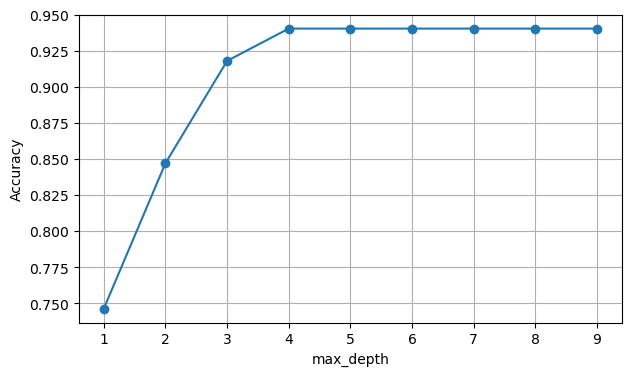


Best max_depth: 4
Highest accuracy: 0.9402985074626866


In [13]:
# Remove unwanted columns
drop_cols = ["charges", "chargeGroup", "id"]
X_train = train_dataset_oh.drop(columns=drop_cols)
y_train = train_dataset_oh["chargeGroup"]

X_test = test_dataset_oh.drop(columns=drop_cols)
y_test = test_dataset_oh["chargeGroup"]

# Train Decision Trees with max_depth = 1 to 9
depths = list(range(1, 10))
accuracies = []

for depth in depths:
    model = DecisionTreeClassifier(
        criterion="entropy",
        min_samples_leaf=6,
        max_depth=depth,
        random_state=42
    )
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Depth {depth}: accuracy = {acc}")

# Plot accuracy vs depth
plt.figure(figsize=(7, 4))
plt.plot(depths, accuracies, marker='o')
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
#plt.title("Decision Tree Accuracy by Depth")
plt.grid(True)
plt.show()

# 5. Report best accuracy
best_acc = max(accuracies)
best_depth = depths[accuracies.index(best_acc)]

print("\nBest max_depth:", best_depth)
print("Highest accuracy:", best_acc)

## d)